In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

256.0


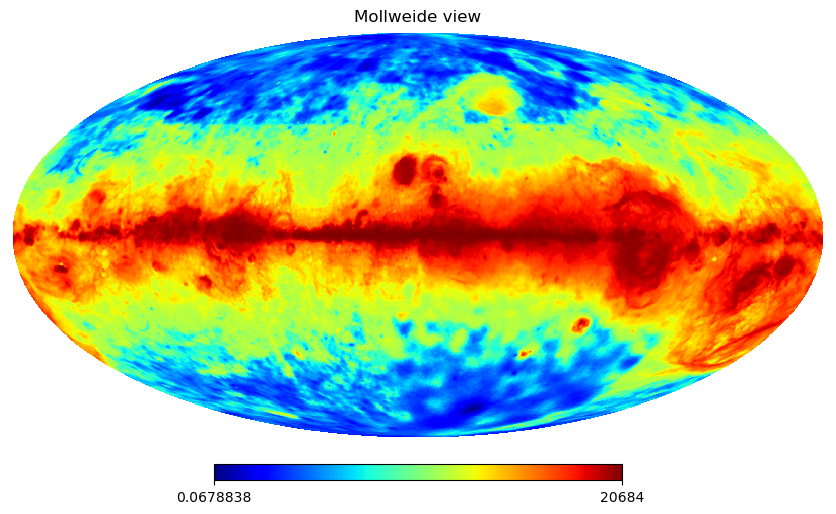

256.0


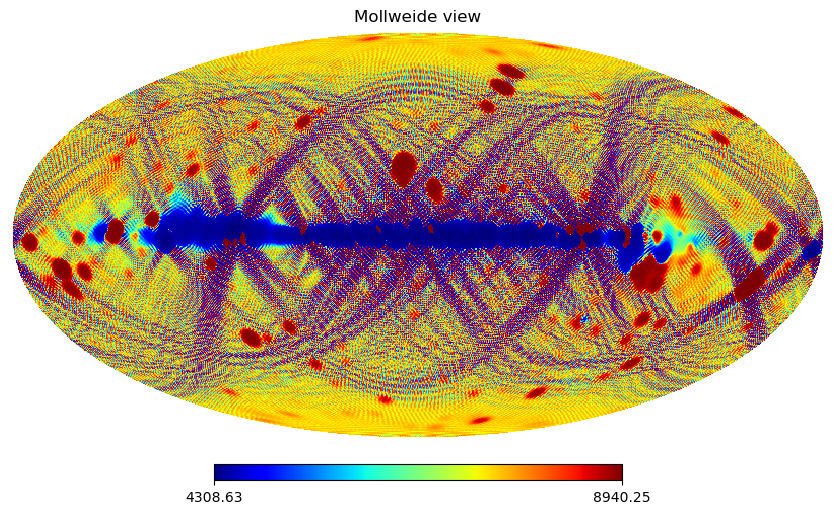

In [31]:
loc = "/Users/melisirfan/Documents/SkyMaps/"
em_map = hp.fitsfunc.read_map(loc+'Hutschenreuter/EM_mean_std.fits')
print(np.sqrt(len(em_map)/12))

hp.mollview(em_map, norm='hist', cmap='jet')
plt.show()

te_map = hp.fitsfunc.read_map(loc+'Commander/COM_CompMap_freefree-commander_0256_R2.00.fits', field=4)
print(np.sqrt(len(te_map)/12))

hp.mollview(te_map, norm='hist', cmap='jet')
plt.show()

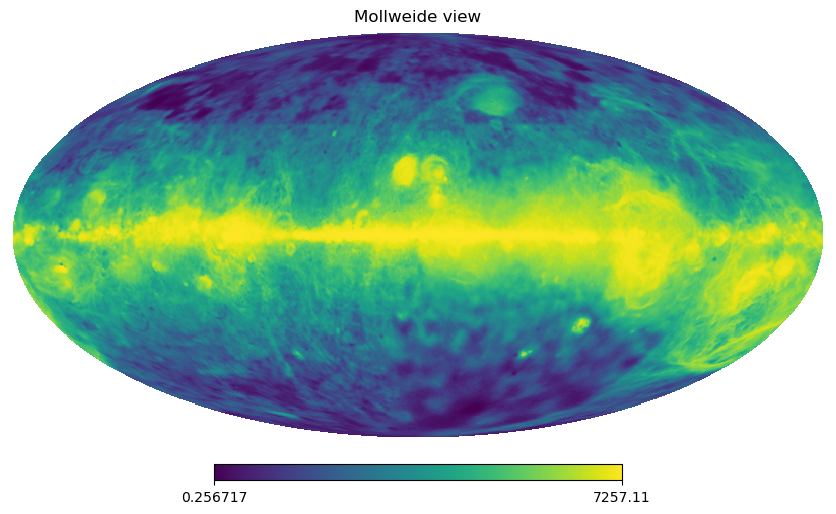

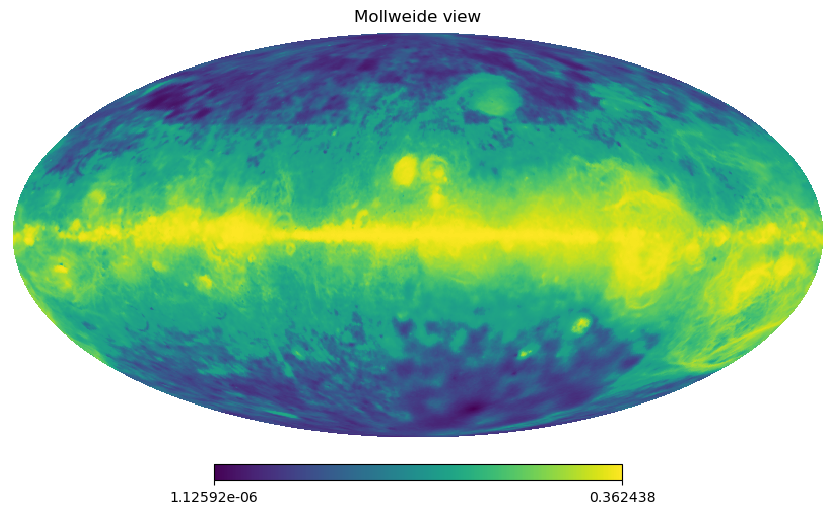

In [35]:
nu_ghz = np.array([0.036, 0.0417, 0.0470, 0.052, 0.0574, 0.0627, 0.0679, 0.0732, 0.408, 10.98, 13.0])
lenf = len(nu_ghz)
ff_map = np.zeros((lenf, len(te_map)))

for ff in range(lenf):

    fact = np.log(nu_ghz[ff] * (te_map/1.e4)**(-3/2.))
    expfact = np.exp(5.960 - (np.sqrt(3) / np.pi) * fact)
    gaunt = np.log(expfact + np.exp(1))
    tau = 0.05468 * te_map**(-3/2.) * nu_ghz[ff]**(-2.0) * em_map * gaunt
    ff_map[ff, :] = te_map * (1 - np.exp(-1. * tau))

hp.mollview(ff_map[0,:], norm='hist')
plt.show()


hp.mollview(ff_map[10,:], norm='hist')
plt.show()

np.save('ff_template_256.npy', ff_map)